## INTERNSAVY , DATA SCIENCE

### TASK TWO

Use clustering techniques for any customer dataset using machine learning 

### Problem Overview
The task at hand is to use clustering techniques in machine learning to analyze and group a customer dataset. Clustering is an unsupervised learning approach that aims to discover natural groupings or patterns within the data without prior knowledge of the groups. 



### Objective
The primary objective is to apply clustering techniques to a customer dataset and identify meaningful customer segments or clusters based on the inherent patterns in the data. These clusters can help businesses in various ways, such as targeted marketing, personalized recommendations, or understanding customer behavior.

In [22]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
dataset = pd.read_csv("Ecommerce Customers.csv")
dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
#Lets view a sample of the datset
dataset.sample()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
218,charris@gmail.com,"2781 Matthew Wells Apt. 569\nPotterview, KS 50...",MediumSeaGreen,32.530829,12.354607,37.122345,2.307552,420.91616


In [4]:
#To check for missing values in the dataset. 
dataset.isnull()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [5]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#To generate summary statistics for the numerical columns in the dataset. 
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


On Our dataset, here are some observations i made:

The dataset contains 500 rows and 8 columns.
The dataset has no missing values, which is a good sign for analysis.

The "Yearly Amount Spent" is likely to be a key feature for clustering, as it represents customer spending behavior.

The average session length, time spent on the app, time spent on the website, and length of membership are other numerical features that might be relevant for clustering.

Categorical features such as "Email," "Address," and "Avatar" are unlikely to be useful for clustering and may need to be dropped or encoded.

## Exploratory Data Analysis - EDA

### UNIVARIATE ANALYSIS
Univariate analysis is a statistical analysis technique that deals with the examination and interpretation of data on a single variable.

This will help me in understanding the characteristics and distribution of a variable without considering the relationships between multiple variables.

Univariate analysis is particularly useful i want to explore and summarize data to gain insights into a specific variable's properties.


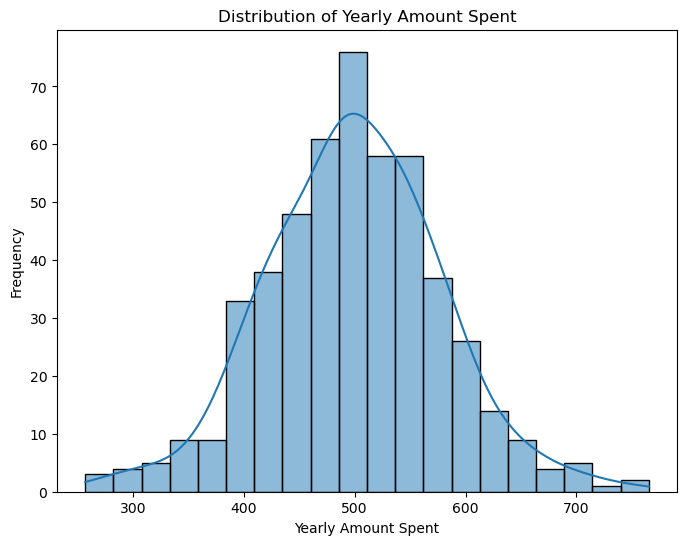

In [7]:
# Histogram for 'Yearly Amount Spent'
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Yearly Amount Spent'], kde=True)
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Frequency')
plt.show()


#### ***Infrence

The histogram of 'Yearly Amount Spent' shows a roughly bell-shaped distribution with a peak around the center.

This suggests that the majority of customers spend an average amount, with fewer customers spending significantly more or less.

There is a long right tail, indicating some customers who spend considerably more than the average.

'Yearly Amount Spent' has a relatively normal distribution with some right-skewness, indicating that most customers spend around the average, but there are high spenders as well.

C:\Users\USER\AppData\Local\Temp\ipykernel_4080\1120392078.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['Time on App'], shade=True)


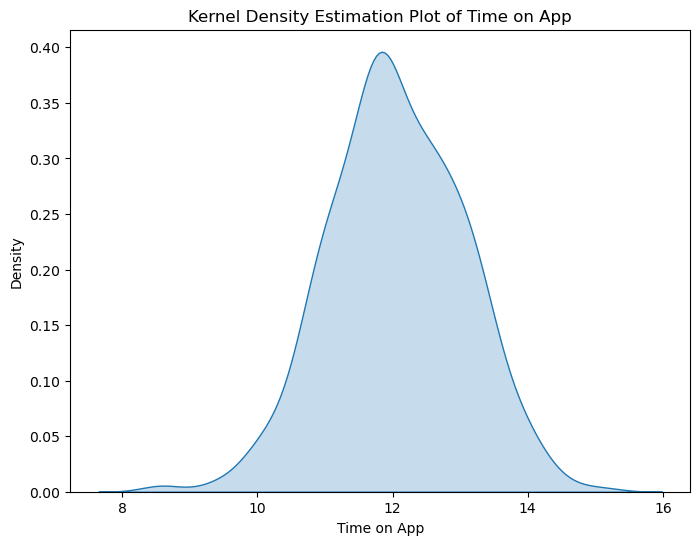

In [8]:
#  KDE plot for 'Time on App'
plt.figure(figsize=(8, 6))
sns.kdeplot(dataset['Time on App'], shade=True)
plt.title('Kernel Density Estimation Plot of Time on App')
plt.xlabel('Time on App')
plt.ylabel('Density')
plt.show()


#### ***Infrence

The KDE plot for 'Time on App' shows a unimodal distribution.

The peak of the distribution suggests that a significant number of customers spend a specific amount of time on the app.

The density curve is smooth, indicating a continuous distribution.

Time on App' follows a unimodal distribution with a peak indicating a specific range of time spent.

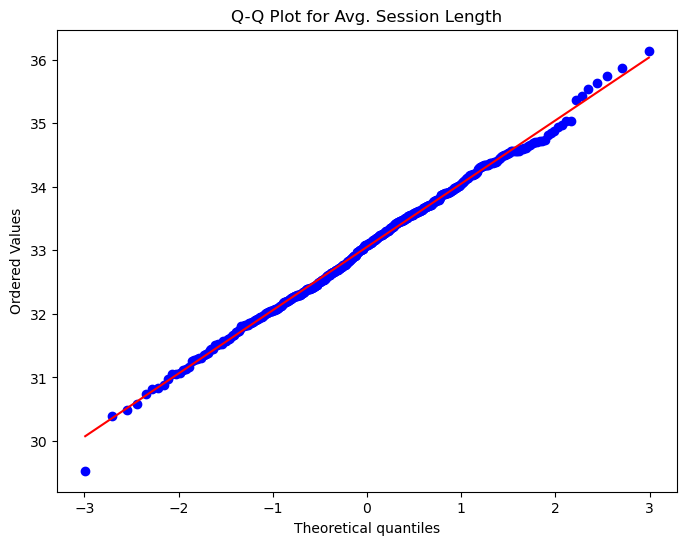

In [9]:
#Q-Q plot for 'Avg. Session Length'

from scipy.stats import probplot

plt.figure(figsize=(8, 6))
probplot(dataset['Avg. Session Length'], plot=plt)
plt.title('Q-Q Plot for Avg. Session Length')
plt.show()








#### Infrence

The Q-Q (Quantile-Quantile) plot is used to assess if the data follows a normal distribution.

In the Q-Q plot for 'Avg. Session Length,' the points do not follow a perfectly straight line, which suggests that this variable may not follow a perfectly normal distribution.

There is some deviation from a normal distribution, particularly in the tails.

'Avg. Session Length' does not perfectly follow a normal distribution, which could imply that this variable might be non-normally distributed.

### BIVARIATE ANALYSIS

This will examine the relationships between pairs of variables.

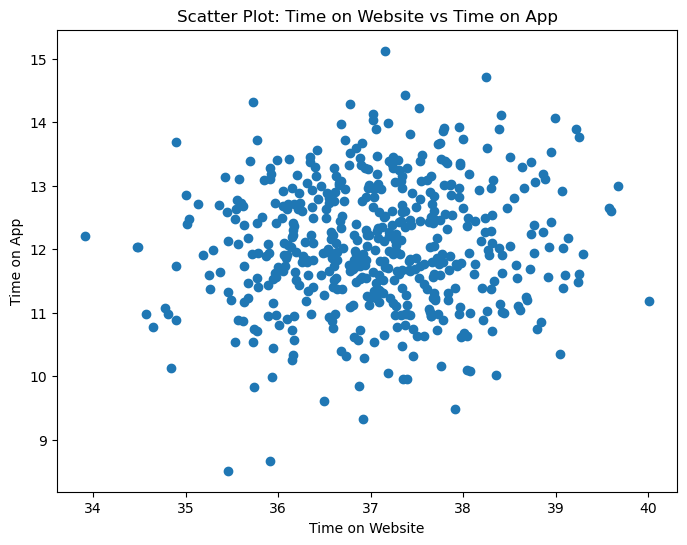

In [11]:
# Scatter plot for 'Time on Website' vs 'Time on App'
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Time on Website'], dataset['Time on App'])
plt.title('Scatter Plot: Time on Website vs Time on App')
plt.xlabel('Time on Website')
plt.ylabel('Time on App')
plt.show()


#### Inference 
The scatter plot shows the relationship between the time spent on the website ('Time on Website') and the time spent on the app ('Time on App') by customers.

There is no clear linear relationship between these two variables, and the points are scattered throughout the plot. 

This suggests that there isn't a strong correlation between the time spent on the website and the time spent on the app.

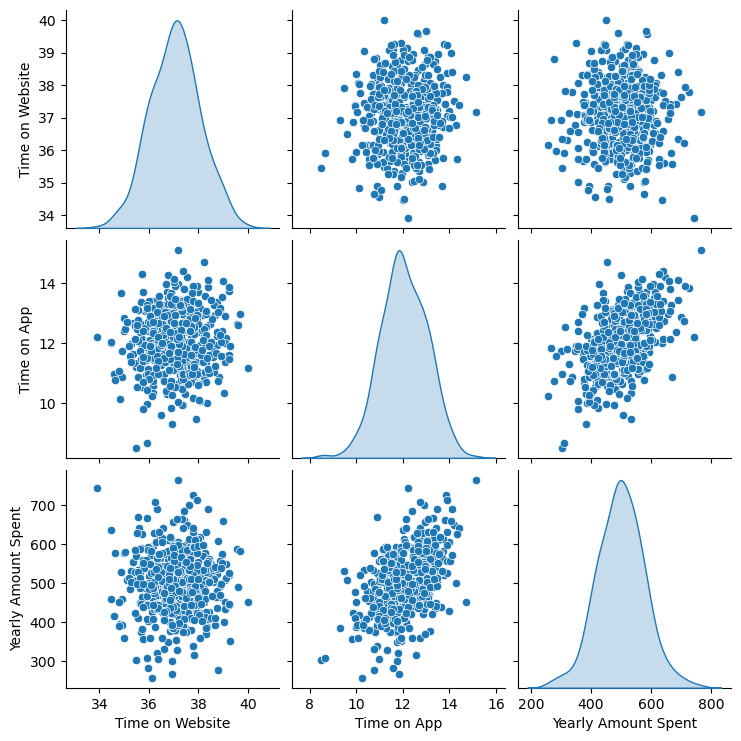

In [12]:
# Pair plot for our datasets numerical features
sns.pairplot(dataset[['Time on Website', 'Time on App', 'Yearly Amount Spent']], diag_kind='kde')
plt.show()

#### Inference
The pair plot displays scatter plots for the relationships between these three numerical features and histograms of each variable on the diagonal.

'Yearly Amount Spent' seems to have a positive correlation with 'Time on App' as it shows an upward trend in the scatter plot. 

This suggests that customers who spend more time on the app tend to spend more annually.

'Time on Website' doesn't show a clear relationship with 'Yearly Amount Spent,' as the scatter plot appears fairly uniform with no clear trend.

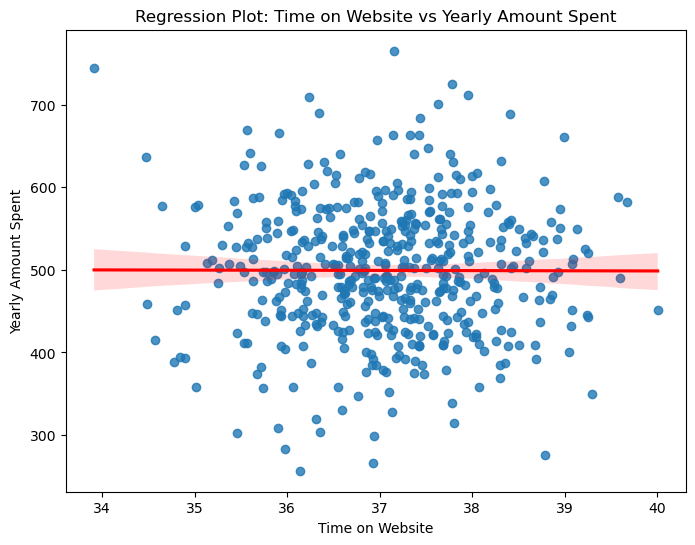

In [13]:
# Regression plot for 'Time on Website' vs 'Yearly Amount Spent'
plt.figure(figsize=(8, 6))
sns.regplot(x='Time on Website', y='Yearly Amount Spent', data=dataset, line_kws={'color': 'red'})
plt.title('Regression Plot: Time on Website vs Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.show()

#### *Inference

The regression plot visualizes the relationship between 'Time on Website' and 'Yearly Amount Spent.'

The regression line (in red) doesn't have a strong positive or negative slope, indicating that the time spent on the website is not a strong predictor of yearly spending. 

The data points are scattered around the line without a clear pattern.

## MODELING

In [14]:
#Since my dataset have columns like "Email," "Address," and "Avatar," which are categorical,i am going to drop them.
#These columns since they may not provide meaningful information for clustering analysis  which is what i am doing next

dataset = dataset.drop(["Email", "Address", "Avatar"], axis=1)
dataset


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [15]:
#Next i am going to Standardize/Normalize Dataset- numerical features (the columns with data type float64) so that they have similar scale then i perform clustering.

from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Lets check the preprocessed data
print(dataset.head())



   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             1.456351     0.607280         2.493589              0.550107   
1            -1.136502    -0.949464         0.206556             -0.870927   
2            -0.052723    -0.727139         0.049681              0.572067   
3             1.263010     1.676390        -0.335978             -0.413996   
4             0.279838     0.747770         0.471737              0.914422   

   Yearly Amount Spent  
0             1.118654  
1            -1.351783  
2            -0.148501  
3             1.041684  
4             1.263224  


#### Inference 

In summary,i can say that the standardization process has made the dataset suitable for clustering analysis, as it ensures that all numerical features have similar scales and no particular feature dominates the clustering process. 

This transformed data can now be used for clustering techniques to identify meaningful customer segments or clusters based on their behavior and characteristics.

In [16]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade scikit-learn numpy


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/2d/ed/022fc4106f6d97e41e156201274138e0369b27dbfc8c206034f24ebd97d9/numpy-1.26.1-cp39-cp39-win_amd64.whl.metadata
  Using cached numpy-1.26.1-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.1-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Rolling back uninstall of numpy
  Moving to c:\users\user\anaconda3\lib\site-packages\numpy-1.24.3.dist-info\direct_url.json
   from C:\Users\USER\AppData\Local\Temp\pip-uninstall-p8w574tp\direct_url.json
  Moving to c:\users\user\anaconda3\lib\site-packages\numpy-1.24.3.dist-info\entry_points.txt
   from C:\Users\USER\AppData\Local\Temp\pip-uninstall-p8w574tp\entry_points.txt
  Moving to c:\users\user\anaconda3\lib\site-packages\numpy-1.24.3.dist-info\installer
   from C:\Users\USER\AppData\Local\Temp\pip-uni

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\numpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [18]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [24]:
#I will apply clustering algorithms to identify customer segments. 
#In this case we will use K-Means


from sklearn.cluster import KMeans
import joblib

# Set the number of threads explicitly
joblib.parallel_backend('loky', n_jobs=-1)

# Select the features for clustering
features = dataset[numerical_cols]

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
dataset['Cluster'] = kmeans.fit_predict(features)

# View the clustered dataset
print(dataset.head())


   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             1.456351     0.607280         2.493589              0.550107   
1            -1.136502    -0.949464         0.206556             -0.870927   
2            -0.052723    -0.727139         0.049681              0.572067   
3             1.263010     1.676390        -0.335978             -0.413996   
4             0.279838     0.747770         0.471737              0.914422   

   Yearly Amount Spent  Cluster  
0             1.118654        0  
1            -1.351783        1  
2            -0.148501        1  
3             1.041684        2  
4             1.263224        2  


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#### Inference

In summary, the K-Means algorithm has successfully clustered the customers into three segments based on their behavior and characteristics. 

To gain a deeper understanding of these clusters, you can further analyze and interpret the characteristics of each cluster, and this information can be used for making business decisions, such as targeted marketing, personalized recommendations, or other strategies tailored to each customer segment.

In [20]:
#Lets now Analyze the Clusters to gain insights into customer behavior
#Lets start by calculating cluster statistics, such as the mean values for each numerical feature within each cluster.
#This is to understand the characteristics of customers in each cluster.

# Calculate cluster means
cluster_means = dataset.groupby('Cluster')[numerical_cols].mean()

# View the cluster means
print(cluster_means)

         Avg. Session Length  Time on App  Time on Website  \
Cluster                                                      
0                  -0.397905     0.616714         0.782080   
1                  -0.250175    -0.626085        -0.221222   
2                   0.621899     0.164610        -0.428769   

         Length of Membership  Yearly Amount Spent  
Cluster                                             
0                    0.026916             0.185078  
1                   -0.686639            -0.925331  
2                    0.741064             0.870241  


#### Infrence 
Cluster Statistics:

The table displays the mean values of numerical features for each of the three clusters (labeled as 0, 1, and 2).
Each row in the table represents a different cluster, and each column represents a numerical feature.

Interpretation of Cluster Means:


Cluster 0:

Customers in Cluster 0 have an average 'Avg. Session Length' that is below the overall dataset mean.
They spend more time on the app ('Time on App') compared to the dataset mean.
The 'Time on Website' for Cluster 0 customers is also above the dataset mean.
The 'Length of Membership' is close to the dataset mean, indicating that these customers have moderate membership lengths.
The 'Yearly Amount Spent' for Cluster 0 is slightly above the dataset mean, suggesting that these customers tend to spend more.


Cluster 1:

Customers in Cluster 1 have below-average 'Avg. Session Length.'
They spend less time on both the app and the website compared to the dataset mean.
The 'Length of Membership' for Cluster 1 is significantly below the dataset mean.
The 'Yearly Amount Spent' is also notably lower, indicating that these customers tend to spend less.


Cluster 2:

Customers in Cluster 2 have above-average 'Avg. Session Length.'
They spend more time on the website compared to the dataset mean.
The 'Time on App' and 'Length of Membership' are close to the dataset mean.
The 'Yearly Amount Spent' for Cluster 2 is notably higher than the dataset mean, suggesting that these customers are high spenders.

Behavioral Differences:

The clusters reveal behavioral differences among customer groups. 

Cluster 0 seems to be characterized by customers who engage more with the app and website and have higher spending. Cluster 1 represents customers with lower engagement and spending. Cluster 2 consists of customers with high spending, particularly on the website.



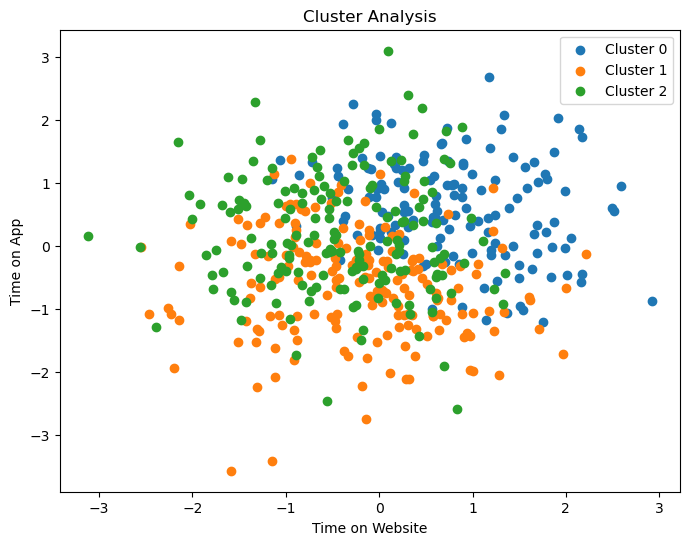

In [21]:
# Now lets visualize the clusters
# Scatter plot for 'Time on Website' vs 'Time on App'
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(
        dataset[dataset['Cluster'] == cluster]['Time on Website'],
        dataset[dataset['Cluster'] == cluster]['Time on App'],
        label=f'Cluster {cluster}',
    )
plt.xlabel('Time on Website')
plt.ylabel('Time on App')
plt.legend()
plt.title('Cluster Analysis')
plt.show()


### Inferences

**Cluster Separation:**

The scatter plot differentiates the data points into three clusters, each represented by a different color (Cluster 0, Cluster 1, and Cluster 2).
Each data point belongs to one of these clusters, and the plot helps visualize the separation of these clusters in the 'Time on Website' vs. 'Time on App' feature space.

**Cluster Characteristics:**

Cluster 0 (in blue) primarily occupies the region with higher 'Time on App' and 'Time on Website.'
Cluster 1 (in orange) is concentrated in the region with lower 'Time on App' and 'Time on Website.'
Cluster 2 (in green) appears to have a mix of both 'Time on App' and 'Time on Website' but is slightly different from Cluster 0.




### CONCLUSION AND SUMMARY

**Targeted Strategies**

The visualization can guide targeted marketing and engagement strategies. For example, Cluster 0 could be targeted for loyalty programs to further boost their engagement and spending. Cluster 1 may require efforts to increase their interaction with both the app and the website, potentially through personalized recommendations. Cluster 2, with a preference for the website, may benefit from optimizations to the website user experience.


The scatter plot provides a clear visual representation of the clusters and their characteristics in terms of 'Time on Website' and 'Time on App.' This information is valuable for making data-driven decisions and strategies to enhance customer engagement, increase spending, and improve the overall customer experience. 


**Business Implications**

These insights can guide business decisions. For example, Cluster 0 might be the target for loyalty programs to further boost their spending. 

Cluster 1 may require efforts to improve their engagement and spending.

Cluster 2 could be a focus for optimizing the website experience to maximize their already high spending.

**Summary**

Analyzing the cluster statistics provides valuable insights into customer behavior and can inform data-driven strategies and decisions to enhance customer relationships and business performance.